# Exoplanet Characteristics Based on a TESS Transit Observation

## Learning Goals
By the end of this tutorial, you will:

* Understand what a planet transit is
* Use authentic TESS data to measure the planetary orbital period
* Use Kepler's Laws to determine the semimajor axis of the planet's orbit (distance from the star)
* Use the depth of the transit to determine the size of the planet relative to the star
* Compare the size of the planet to the Earth

## Nomenclature
It is often useful to compare exoplanets and stars to our own solar system. However, it very quickly gets tedious to say things like "1.1 Earth masses", so astronomers use some specialized vocabulary for these things.

* The symbol ☉ means "Solar" or "Sun". For example,  𝑀☉
  would mean "Solar Mass".
* The symbol ⊕ means "Earth".  𝑅⊕
 , for example means "Earth radius".
* AU, or astronomical unit, is the (average) distance at which the Earth orbits the sun.

## How are exoplanets discovered?
### What is a transit? 

<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Exoplanet_transit_method.gif" width="500">

A transit occurs when a planet passes between a star and its observer. Transits reveal an exoplanet not because we directly see it from many light-years away, but because the planet passing in front of its star ever so slightly dims its light. This dimming can be seen in light curves – graphs showing light received over a period of time. When the exoplanet passes in front of the star, the light curve will show a dip in brightness. A light-curve is a plot of flux vs time, which is the type of plot we will be making today. 

More than just exoplanets, transits can be used to discover and analyze a variety of astronomical systems including binary stars, asteroseismic signals, and much more.

## Running This Lab

In order to run this lab, type in the name of the exoplanet inside the quotation marks in the box below. Then select the "Restart Kernel and Run All Cells" button in the toolbar above. It should look like a fastforward symbol (two triangles next to each other).

To start, we will be using exoplanet TOI-3235

In [1]:
#Enter the name of the exoplanet within the quotation marks below
exoplanet_name = ""

In [2]:
#Exoplanets

#Jupiter-sized: TOI-3235 - tess2023096110322-s0064-0000000243641947-0257-s - Stellar Radius of 0.3697 R - Stellar Mass of 0.3939 M
#Uranus-sized: LTT 9779 - tess2018234235059-s0002-0000000183985250-0121-s - Stellar Radius of 0.949 R - Stellar Mass of 0.770 M
#Earth-sized/advanced techniques: 
#Mutli-planet system: TOI-1130 - tess2023181235917-s0067-0000000254113311-0261-s - Stellar Radius of 0.687 R - Stellar Mass of 0.684 M

#Code written by Alexander Templeton

In [3]:
from astropy.io import fits
from astropy.table import Table

from astroquery.mast import Observations
from astroquery.mast import Tesscut

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np

import math

import random

# Eanble cloud data access
Observations.enable_cloud_dataset()

import ipywidgets as widgets
from ipywidgets import interactive

INFO: Using the S3 STScI public dataset [astroquery.mast.cloud]


In [4]:
# Query for TESS time series Observations of our target
TESS_table = Observations.query_criteria(objectname=exoplanet_name, 
                                         obs_collection="TESS", 
                                         dataproduct_type='timeseries'
                                        ) 

# Get associated science products for each Observation
data_products = Observations.get_product_list(TESS_table) 


# Keep only the science products
filtered = Observations.filter_products(data_products, productType="SCIENCE")

if exoplanet_name == 'TOI-3235':
    ex_id = 'tess2023096110322-s0064-0000000243641947-0257-s'
elif exoplanet_name == 'LTT 9779':
    ex_id = 'tess2018234235059-s0002-0000000183985250-0121-s'
elif exoplanet_name == 'TOI-1130':
    ex_id = 'tess2023181235917-s0067-0000000254113311-0261-s'

# Get the light curve files
lc_prod = Observations.filter_products(data_products, 
                                       obs_id = ex_id, 
                                       productSubGroupDescription = "LC")

# Download the lc file
lc_file = Observations.download_products(lc_prod)['Local Path'][0]

#Take a peek at the FITS file we downloaded
fits.info(lc_file)
lc_fits = fits.open(lc_file)

lc = lc_fits[1].data

pdcflux = lc['PDCSAP_FLUX'] #PDCSAP flux column
#sapflux = lc['SAP_FLUX'] #SAP flux column
time_lc = lc['TIME'] #time column
int_values = []
int_time = []
i = 0
while i < len(pdcflux):
    if pdcflux[i] >= 0:
        int_values.append(pdcflux[i])
        int_time.append(time_lc[i])
    i+=1
minimum = min(int_time)
mean = np.mean(int_values)
stdv = np.std(int_values)
unocculted = []
for i in int_values:
    if i > (mean-stdv*1.4):
        unocculted.append(i)
true_mean = np.mean(unocculted)
true_stdv = np.std(unocculted)

INFO: Found cached file ./mastDownload/TESS/tess2023096110322-s0064-0000000243641947-0257-s/tess2023096110322-s0064-0000000243641947-0257-s_lc.fits with expected size 1969920. [astroquery.mast.cloud]
Filename: ./mastDownload/TESS/tess2023096110322-s0064-0000000243641947-0257-s/tess2023096110322-s0064-0000000243641947-0257-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19385R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [5]:
def colors(period):
    quotient = (int_time - minimum) // period
    color_list = []
    for i in quotient:
        if (i % 10) == 0:
            color_list.append('blue')
        elif (i % 10) == 1:
            color_list.append('orange')
        elif (i % 10) == 2:
            color_list.append('green')
        elif (i % 10) == 3:
            color_list.append('red')
        elif (i % 10) == 4:
            color_list.append('purple')
        elif (i % 10) == 5:
            color_list.append('brown')
        elif (i % 10) == 6:
            color_list.append('pink')
        elif (i % 10) == 7:
            color_list.append('gray')
        elif (i % 10) == 8:
            color_list.append('olive')
        elif (i % 10) == 9:
            color_list.append('cyan')
        else:
            color_list.append('black')
    return color_list

In [6]:
def graph(period):
    x = (int_time-minimum) % period
    y = int_values
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s = .4, c = colors(period))
    plt.minorticks_on()
    plt.xlabel('DATE (DAYS SINCE BJD 2457000)')
    plt.ylabel('STELLAR BRIGHTNESS (counts/s)')
    plt.show()

In [7]:
def base_graph(period):
    x = int_time-minimum
    y = int_values
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s = .5, c = colors(period))
    plt.minorticks_on()
    plt.xlabel('DATE (DAYS SINCE BJD 2457000)')
    plt.ylabel('STELLAR BRIGHTNESS (counts/s)')
    plt.show()

In [8]:
def colorless_graph():
    x = int_time-minimum
    y = int_values
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s = .5)
    plt.minorticks_on()
    plt.xlabel('DATE (DAYS SINCE BJD 2457000)')
    plt.ylabel('STELLAR BRIGHTNESS (counts/s)')
    plt.show()

In [9]:
modulus_slider = widgets.FloatSlider(
    value=8.0,
    min=0.5,
    max=8.0,
    step=0.01,
    description='Period (Days)',
    layout=widgets.Layout(width=f'{750}px'),
    continuous_update=True
)

normal_plot = interactive(base_graph, period = modulus_slider)
folding_plot = interactive(graph, period = modulus_slider)

## Plotting the lightcurve

Whenever we observe a star for any period of time, we'll observe natural random fluctuations in its brightness. These can be due to atmospheric distortion (though in our case we are using data from the TESS satellite above the atmosphere), imperfect instrumentation, or actual fluctuations in the star such as sunspots or solar flares. So then how do we distiguish where a planet has transited versus normal random fluctuation in brightness? 

### Answer 1: Planet transits are periodic.

Here on Earth a year is always 365.24 days (the .24 at the end is why we have leap years). On Mercury, a year is always exactly 87.97 days. The exoplanets we will look at today orbit much closer to their star and thus have much shorter years, but the same rule applies. Exactly once a year, when the planet passes exactly between its star and us, it will block some of the light from its star. You can convince yourself this happens once a year by watching where the dimming happens in the graphic at the start of this lab.

### Answer 2: Planet tranists always block the same amount of light.

On the time scale of days or even years, planets tend not to change size very much (if you see a planet changing size over the span of days, it's probably not having a very good time). Therefore, they will always block the same planet-sized amount of light from its star, while random fluctuations are, as the name implies, largely random in the change in brightness. So, if we see a periodic dip in light of roughly the same size, it's likely we've just spotted an exoplanet.

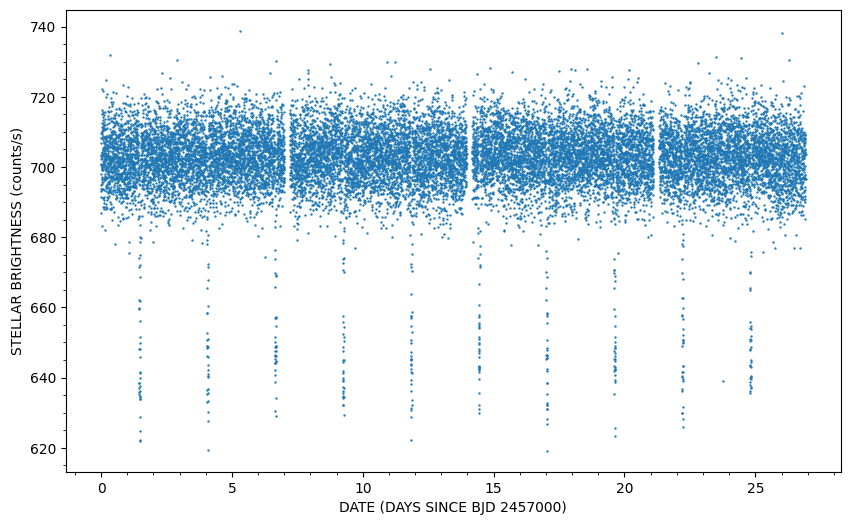

In [10]:
colorless_graph()

### Interpreting the lightcurve

Use the lightcurves above to answer the following questions:
1. What is the x-axis?
2. What is the y-axis?
3. What does each point represent?
4. What features do you notice about the stellar brightness?
5. What is happening at each major dip? How can you tell?
6. How many occultations occurred over the duration of the recorded data?

## Folding the lightcurve

As mentioned before, the period at which we observe a dip in the lightcurve corresponds with the lenght of one year on that exoplanet, which is to say how long it takes to complete one orbit around its star, also known as its orbital period. Now the simplest way to find this value is to take two adjacent dips and measure the time between them. This will get us in the ballpark, but might not be the most precise answer. We can improve this by instead measuring the time between the first and last dips we see, and dividing by the amount of dips minus on. Finding the average like this will mitigate any imprecision in our measurement. There is, however, another method we can use to get an even more precise measurement: Folding.

If we take the light curves of each period and overlay them over eachother, in theory we should see the the light dips stacking at the exact same place within each period. However, if we are folding the curve at some period that is not the true period of the exoplanet, the light dips will not align with each other. The visual below indicates with colors where the light curve is being folded. Wherever the color changes in the top graph, the light curve starts back from zero in the bottom graph. The bottom graph is simply the various color sections of the top graph stacks on top of each other. Play around with the slider to see how the changes in the top graph affect the bottom graph to better understand what is happening here.

### Finding the period

To find the period, first come up with a rough guess by simply finding the difference between two adjacent dips in the light curve. Write this value down. Then, starting at this rough guess, adjust the period slider to fold the graph until the dips are all aligned. Once the bottom graph looks like a single dip, you've found the period (duration of 1 year) of the exoplanet!

Looking back on the top graph, you should see each folded section should evenly encompass each periodic light dip. Take a moment to once again imagine stacking each section on top of each other and transforming the top graph into the bottom one.

NOTE: Adjustments on the slider will take a second to load on the graph, so make sure not to overshoot

In [11]:
display(normal_plot)
display(folding_plot)

interactive(children=(FloatSlider(value=8.0, description='Period (Days)', layout=Layout(width='750px'), max=8.…

interactive(children=(FloatSlider(value=8.0, description='Period (Days)', layout=Layout(width='750px'), max=8.…

Use the interactive plots above to answer the following questions:

1. What was your initial estimate of the period before folding the light curve? How did you come up with this number?
2. Using curve folding, what value of the period did you find?
3. How does this compare to a year on Earth (365.24 days)?
4. How does this compare to a year on Mercury (87.87 days)?

### Finding the Semi-major Axis

Now that we've found the planet's orbital period, we can use Kepler's Third Law to determine the semi-major axis of it's orbit. Recall that Kepler's Third Law states $a^{3}=(M_{star}+M_{planet})P^{2}$ where $a$ is the semi-major axis in astronomical units, $P$ is the period of the orbit in years, $M_{star}$ is the mass of the star in solar masses, and $M_{planet}$ is the mass of the planet in solar masses. In our case, the mass of the star is so large, and the mass of the planet is so small, that $M_{star}+M_{planet} \approx M_{star}$. Thus, $a^{3}=(M_{star})P^{2}$. From studying the star of our first exoplanet, we've found that its mass is 0.394 $M_☉$. We can convert the period in days to years by dividing by 325.24.

Using the simplified equation above, the given value of the mass of the star, and the orbital period you discovered earlier, answer the following questions:
1. What is the semi-major axis of TOI-3235 b? (show your work)
2. How does this compare to Earth's orbit around the sun (1 AU)?
3. How does this compare to Mercury's orbit around the sun (0.39 AU)?
4. What predictions can you make about the temperature of TOI-3235 b?

## Checking Our Assumption About the Planet's Mass
In the calculation above, we assumed that the mass of the planet could be ignored compared to the mass of the star. Let's check that assumption. Astronomers have been able to obtain radial velocity measurements of the motion of TOI-3235 A in response to the planet orbiting it, and these measurements indicate that the mass of the planet is about 0.665 times the mass of Jupiter, or about 211 times the mass of the Earth. Converting this to solar masses, we find its mass to be 0.000635 $M_☉$.

Using the full equation of Kepler's Third Law, answer the following questions:
1. What is the semi-major axis of TOI-3235 b?
2. What is the difference between this result and the result calculated in the previous section?

By getting nearly the same answer as before, we've verified that our assumption that we could ignore the mass of the planet was valid. (HINT: If you did not get this result, you may want to look over your calculations again.)

## The Size of the Planet
Let's now focus on determining the size of the planet relative to its parent star. We can do this by examining the "depth" of the transit. If the planet were the same size as the star, it would block 100% of the light of the star when it passes in front of the star. In our case, if we look at the values on the Y-axis of our plots, we see that the planet was blocking only a small part of the light of the star, so we know it must be much smaller than the star. The amount of light blocked is proportional to the area of the planet divided by the area of the star. That is, $depth=\frac{A_{planet}}{A_{star}}$. The area of the planet is simply $A_{planet}=\pi \times r_{planet}^{2}$ where $r_{planet}$ is the radius of the planet. Similarly, the area of the star is $A_{star}=\pi \times r_{star}^{2}$ where $r_{star}$ is the radius of the star. Plugging these into the equation for the depth of the transit, we get $depth=\left( \frac{r_{planet}}{r_{star}} \right)^2$. 

To better understand the relationship between planet size and the depth of transit, play around with the simulated light curve below. The first slider changes the proportional radius of the planet to its star. The second slider can zoom in on the y-axis to make the transit more prominent.

In [12]:
def fake_light_curve(dip, lower_bound):
    per_dip = dip**2
    x = list(range(1, 401))
    y = []
    for i in x:
        if i < 180 or i > 220:
            y.append(random.randrange(int(true_mean-true_stdv*1.36), int(true_mean+true_stdv*1.36)))
        elif 180 <= i <= 190:
            y.append(random.randrange(int(true_mean-true_stdv*1.36-np.sin((200-i)/20*math.pi)*per_dip*true_mean), int(true_mean+true_stdv*1.36-np.sin((200-i)/20*math.pi)*per_dip*true_mean)))
        elif 190 < i < 210:
            y.append(random.randrange(int(true_mean-true_stdv*1.36-per_dip*true_mean), int(true_mean+true_stdv*1.36-per_dip*true_mean)))
        elif i >= 210:
            y.append(random.randrange(int(true_mean-true_stdv*1.36-np.sin((220-i)/20*math.pi)*per_dip*true_mean), int(true_mean+true_stdv*1.36-np.sin((220-i)/20*math.pi)*per_dip*true_mean)))
    plt.figure(figsize=(9, 5))
    plt.scatter(x, y, s = .5)
    plt.ylim(int(lower_bound*true_mean*.01), int(true_mean+true_stdv*1.36+true_mean*(100-lower_bound)*.001))
    plt.show

In [13]:
def planet(radius, lower):
    fig, ax = plt.subplots(figsize=(2, 2))
    outer_circle = plt.Circle((1, 1), 1, fill=True, color='yellow', linewidth=2)
    inner_circle = plt.Circle((1, 1), radius, fill=True, color='brown')
    ax.add_patch(outer_circle)
    ax.add_patch(inner_circle)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_aspect('equal')
    fake_light_curve(dip=radius, lower_bound=lower)

radius_slider = widgets.FloatSlider(
    value=0.10,
    min=0.01,
    max=1.0,
    step=0.01,
    layout=widgets.Layout(width=f'{500}px'),
    description='Planet Radius(% of Star):',
    continuous_update=False
)

height_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=99.5,
    step=1,
    layout=widgets.Layout(width=f'{500}px'),
    description='Y-axis lower bound (%):',
    continuous_update=False
)

planet_star = interactive(planet, radius=radius_slider, lower=height_slider)
display(planet_star)

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='Planet Radius(% of Star):',…

Now that we understand the relationship between planet size and transit depth, let's figure out the radius of exoplanet TOI-3235 b. First, isolate a single transit with a somewhat average depth using the plots below.

In [14]:
def size_graph(x_bounds):
    x = time_lc
    y = pdcflux
            
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s = .5)
    plt.xlabel('DATE (DAYS SINCE BJD 2457000)')
    plt.ylabel('STELLAR BRIGHTNESS (counts/s)')
    plt.xlim(min(time_lc), max(time_lc))
    plt.axvline(x=x_bounds[0], color='red', linestyle='--', linewidth=.7)
    plt.axvline(x=x_bounds[1], color='red', linestyle='--', linewidth=.7)
    plt.minorticks_on()
    plt.show()
    
    size_graph_bounded(x_bounds)

In [15]:
#x_bounds_slider

if exoplanet_name == "TOI-3235":
    margins = '0px 0px 0px -26px'
else:
    margins = '0px 0px 0px -12px'

x_bounds_slider = widgets.FloatRangeSlider(
    value=(min(time_lc), max(time_lc)),
    min=min(time_lc),
    max=max(time_lc),
    step=.05,
    description='X Bounds:',
    continuous_update=False,
    layout=widgets.Layout(width=f'{1000}px', margin=margins)
)

In [16]:
def size_graph_bounded(x_bounds):
    x = time_lc
    y = pdcflux
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s = .5)
    plt.xlabel('DATE (DAYS SINCE BJD 2457000)')
    plt.ylabel('STELLAR BRIGHTNESS (counts/s)')
    plt.minorticks_on()
    plt.xlim(x_bounds)
    plt.show()

In [17]:
data_range = interactive(size_graph, x_bounds=x_bounds_slider)
display(data_range)

interactive(children=(FloatRangeSlider(value=(3041.113255902165, 3068.036036177217), continuous_update=False, …

Now, if we rearrange the equation of depth we found earlier, we can find the ratio of the radius of the planet versus the star: $\frac{r_{planet}}{r_{star}}=\sqrt{depth}$. If we know the radius of the star already, we can rearrange some more to find the absolute radius of the planet: $r_{planet}=r_{star} \times \sqrt{depth}$. In our case, we happen to know the radius of star TOI-3235 as 0.370 $R_☉$. One Solar radius is equal to 695,700 km. One Jupiter radius is equal to 69,911 km. One Earth radius is equal to 6,371 km.
With this in mind, answer the following questions:

1. What is the average baseline brightness of the star?
2. What is the brightness at the peak of the transit?
3. What is the depth of transit (difference between the prior two values)?
4. What is the relative size of the planet compared to its star? (HINT: You can check your answer by replicating the real data with the simulated light curve in the prior plot)
5. What is the absolute size of exoplanet TOI-3235 b in Solar radii? In Jupiter radii? In Earth radii? In km?
6. Looking at both the size and semi-major axis of this exoplanet, is there any equivalent planet in our solar system?

## Exploring Other Exoplanet Types

So far, we've only looked at a single exoplanet, known as a Jupiter-type exoplanet for its size. These are some of the most commonly discovered exoplanet types, due to how easy it is to spot the dip from a Jupiter-type transit. However, they are far from the only type of exoplanet we've discovered. We'll briefly explore two other exoplanet systems below.

### LTT 9779

To start, change the exoplanet name at the start of this lab to "LTT 9779" and re-run the program with the "Restart Kernel and Run All Cells" button as before. Given this exoplanet's star has a radius of 0.949 $R_☉$ and a mass of 0.770 $M_☉$, answer the following questions:

1. What is the period of this exoplanet?
2. What is the semi-major axis?
3. What is its radius relative to its star?
4. What is its radius in Earth radii?
5. How does the size of this planet compare to the first exoplanet we looked at?
6. How does the relative size of the noise (the random fluctuations outside an actual transit) compare to the data for the first exoplanet?
7. Why might the smaller size relative to its star make the data appear noisier?
8. Given your answer to the previous question, why might we have discovered relatively few Earth-sized or smaller exoplanets?


### TOI-1130

Once again, change the exoplanet name at the start of the lab to "TOI-1130" and re-run the program. Take a moment to note the differences between this light curve and the previous light curves we've looked at so far. At first, this exoplanet seems to break the rules for exoplanet transits we learned earlier, they are neither periodic nor consistent in depth. That's because we're not looking at one exoplanet, but multiple! We've discovered a multi-planet system! With this in mind, answer the following questions:

1. How many planets can you see in this system?
2. What is the period of each planet?

Without doing all the math again, what can you say at a glance about the planets in this system in regards to:

3. Which planet orbits closer to their star?
4. Which planet is bigger?

And finally:

5. What would our own solar system look like if it were observed from a distance in this way?

## Conclusion

As a reminder of what all this data actually looks like in our telescopes, go back and look at the pixel diagram at the very start of the lab. From just the dimming or brightening of one pixel on our sensor, we've been able to determine that this star has a planet (or multiple!) orbiting it, how big that planet is, how fast it orbits its star, and its distance from the star. And all this from a simple understanding of Kepler's Laws of Planetary Motion discovered over 400 years ago. Now that's pretty incredible!